In [1]:
%autosave 300

Autosaving every 300 seconds


# Начальный этап работы с набором данных:

## Содержание:
<a name='s'></a>
1. [Загрузка основной библиотеки для работы с данными](#b)
2. [Чтение CSV файла](#r)

### Загрузка основной библиотеки для работы с данными:
<a name='b'></a>

In [5]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import itk

### Чтение CSV файла
<a name='r'></a>

In [6]:
df = pd.read_csv('xray_chest.csv')

In [3]:
df

,dcm,jpg,type
0,/abscess/0.dcm,/abscess/0.jpg,abscess
1,/abscess/1.dcm,/abscess/1.jpg,abscess
2,/abscess/2.dcm,/abscess/2.jpg,abscess
3,/abscess/3.dcm,/abscess/3.jpg,abscess
4,/abscess/4.dcm,/abscess/4.jpg,abscess
...,...,...,...
92,/tuberculosis/4.dcm,/tuberculosis/4.jpg,tuberculosis
93,/venous_congestion/0.dcm,/venous_congestion/0.jpg,venous congestion
94,/venous_congestion/1.dcm,/venous_congestion/1.jpg,venous congestion
95,/venous_congestion/2.dcm,/venous_congestion/2.jpg,venous congestion


In [4]:
df['type'].unique()

array(['abscess', 'ards', 'atelectasis', 'atherosclerosis of the aorta',
       'cardiomegaly', 'emphysema', 'fracture', 'hydropneumothorax',
       'hydrothorax', 'pneumonia', 'pneumosclerosis',
       'post-inflammatory changes', 'post-traumatic ribs deformation',
       'sarcoidosis', 'scoliosis', 'tuberculosis', 'venous congestion'],
      dtype=object)

Смотрим общую информацию по набору данных:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dcm     97 non-null     object
 1   jpg     97 non-null     object
 2   type    97 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


In [6]:
df['type'].value_counts()

abscess                            9
hydropneumothorax                  9
cardiomegaly                       8
atelectasis                        7
post-inflammatory changes          7
atherosclerosis of the aorta       6
sarcoidosis                        6
fracture                           6
hydrothorax                        5
emphysema                          5
tuberculosis                       5
post-traumatic ribs deformation    5
pneumonia                          5
venous congestion                  4
scoliosis                          4
pneumosclerosis                    4
ards                               2
Name: type, dtype: int64

In [7]:
print(len(df['type'].value_counts()))

17


Данные не в машиночитаемом виде, чтобы перевсти их в нужный вид нужно воспользоваться библиотекой Scikit-learn: https://datagy.io/sklearn-one-hot-encode/ либо более сложным способом - самостоятельно писать функцию для перекодировки данных через 0 и 1 или найти любой другой способ перекодировки, что понравится. 

### Открываем json файл

In [8]:
df_json = pd.read_json('medical_data.json')


In [9]:
display(df_json)

,patients
0,"{'id': 1, 'name': 'Иван Иванов', 'age': 45, 'g..."
1,"{'id': 2, 'name': 'Мария Петрова', 'age': 38, ..."


При работе с алгоритмами будете обращаться к ним по тэгам

### Совмещение файлов от врачей

После разметки тремя врачами необходимо совместить данные для дальнейшего сбора набора данных. Ниже мы проверяем их на наличие дубликатов и совмещаем в один файл для дальнейшего анализа ошибок

In [11]:
df_1 = pd.read_excel('Результат разметки_2.xlsx')

In [12]:
print(len(df_1))

220


In [13]:
duplicates_1 = df_1[df_1.duplicated(keep=False)]

print(duplicates_1)

                                          UID  конкременты ЖП  \
53   5.17239031847312684976506712902315664550           False   
54   5.17239031847312684976506712902315664550           False   
67  5.184472651090842747727643933106853228333           False   
68  5.184472651090842747727643933106853228333           False   

   максимальный размер конкремента количество конкрементов  
53                             NaN                     NaN  
54                             NaN                     NaN  
67                             NaN                     NaN  
68                             NaN                     NaN  


In [14]:
print(len(df_1))
df_1 = df_1.drop_duplicates(keep='first')
print(len(df_1))

220
218


In [15]:
df_2 = pd.read_excel('Результат_разметки_1.xlsx')

In [16]:
duplicates_2 = df_2[df_2.duplicated(keep=False)]

In [17]:
print(duplicates_2)

                                          UID  конкременты ЖП  \
4   5.334797849188039011135650847224948483671            True   
11  5.334797849188039011135650847224948483671            True   

   максимальный размер конкремента количество конкрементов  
4                                6                       7  
11                               6                       7  


In [18]:
print(len(df_2))
df_2 = df_2.drop_duplicates(keep='first')
print(len(df_2))

228
227


In [19]:
df_3 = pd.read_excel('Результат_разметки_3.xlsx')

In [20]:
duplicates_3 = df_3[df_3.duplicated(keep=False)]
print(duplicates_3)

Empty DataFrame
Columns: [UID, конкременты ЖП, максимальный размер конкремента, Количество конкрементов, Плотность конкрементов]
Index: []


Объединяем таблицы

In [21]:
df_merge = df_1.merge(df_2, how='inner', on="UID").merge(df_3, how='inner', on='UID')

In [22]:
df_merge

,UID,конкременты ЖП_x,максимальный размер конкремента_x,количество конкрементов_x,конкременты ЖП_y,максимальный размер конкремента_y,количество конкрементов_y,конкременты ЖП,максимальный размер конкремента,Количество конкрементов,Плотность конкрементов
0,5.109345047606384688427344985864798504303,False,NaN,NaN,True,-,0,False,NaN,NaN,NaN
1,5.109332116298635647054018243209951473750,True,10х4х7,-,True,5,9,True,6.0,3.0,310.0
2,5.119061767544037682661625537455649606098,True,7х6х8,3,True,6х7х9,5,True,7.0,3.0,130.0
3,5.104674459632147953004472240334900716143,False,NaN,NaN,True,-,0,False,NaN,NaN,NaN
4,1.2.392.200036.9116.2.5.1.37.2417546385.168398...,False,NaN,NaN,True,-,0,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
220,4.1862929792.352.1682620232.998,False,NaN,NaN,True,-,0,False,NaN,NaN,NaN
221,45.1.111.4460.1680593777.1,False,NaN,NaN,True,-,0,False,NaN,NaN,NaN
222,45.1.111.6496.1684329228.1,False,NaN,NaN,True,-,0,False,NaN,NaN,NaN
223,465.215542371102860638161065218873777766398,True,17х14х12,-,True,14х19х15,1,True,20.0,1.0,14.0


In [36]:
df_merge.to_excel('merged.xlsx', sheet_name='Лист1', index=False)

C:\Users\paman\AppData\Local\Temp\ipykernel_10024\3711367592.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df_merge.to_excel('merged.xlsx', sheet_name='Лист1', index=False)


### NifTI


это попиксильный вывод изображения

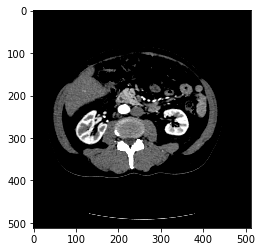

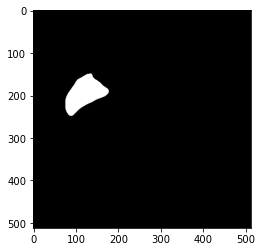

In [3]:
file_volume = "NA.nii.gz"
image = itk.imread(file_volume)
imageArray = itk.GetArrayFromImage(image)
plt.imshow(imageArray[200, :, :], vmin = -60, vmax = 200, cmap = 'gray')
plt.show()
file_volume = "NA_liver.nii.gz"
image = itk.imread(file_volume)
imageArray = itk.GetArrayFromImage(image)
plt.imshow(imageArray[200, :, :], cmap = 'gray')
plt.show()
